# T2.2 Algorisme Perceptró

# Índex

1. Algorisme Perceptró
2. Exemple
3. Convergència i qualitat de la solució

# 1 Algorisme Perceptró

**Origen:** $\;$ primer algorisme d'aprenentatge automàtic; proposat per Frank Rosenblatt en 1958

**Entrada:** $\;$ un conjunt d'entrenament, $\;\mathcal{D}=\{(\boldsymbol{x}_n,y_n)\},\,$ amb $\;\boldsymbol{x}_n\in\mathbb{R}^D\,$ i $\,y_n\in\{1,\dotsc,C\}\,$ per a tot $n$

**Eixida:** $\;$ els pesos d'un classificador lineal, $\;c(\boldsymbol{x}) = \operatorname{argmax}\limits_c\; g_c(\boldsymbol{x}),\;$ amb $\,g_c(\boldsymbol{x})=\boldsymbol{w}_c^t\,\boldsymbol{x} + w_{c0}\,$ per a tot $c$

**Notació homogènia o compacta:** $\;\boldsymbol{x}=(1,x_1,\dotsc,x_D)^t\,$ i $\,\boldsymbol{w}_c=(w_{c0},w_{c1},\dotsc,w_{cD})^t;\quad$ així, $\;g_c(\boldsymbol{x})=\boldsymbol{w}_c^t\,\boldsymbol{x}$

**Objectiu:** $\;$ minimitzar el nombre d'errors en entrenament
$$\mathcal{L}(\{\boldsymbol{w}_c\})%
=\sum\nolimits_n\mathbb{I}(y_n\neq c(\boldsymbol{x}_n))%
=\sum\nolimits_n\mathbb{I}(\max\nolimits_{c\neq y_n}g_c(\boldsymbol{x}_n)>g_{y_n}(\boldsymbol{x}_n))$$

**Objectiu amb marge $b\geq 0$:** $\;$ extensió de l'objectiu bàsic ($b=0$) per tal de generalitzar millor
$$\mathcal{L}(\{\boldsymbol{w}_c\})%
=\sum\nolimits_n\mathbb{I}(\max\nolimits_{c\neq y_n}g_c(\boldsymbol{x}_n)+b>g_{y_n}(\boldsymbol{x}_n))$$
*Interpretació:* $\;$ la pseudo-probabilitat de pertànyer a la classe correcta ha de superar la de qualsevol classe rival amb almenys un marge $b$

**Algorisme Perceptró:** $\;$ versió bàsica amb **factor d'aprenentatge** $\,\alpha>0\,$ per a controlar la velocitat de l'aprenentatge
> **Entrada:** $\;$ dades $\;\mathcal{D}=\{(\boldsymbol{x}_n,y_n)\}\quad$ pesos $\;\{\boldsymbol{w}_c\}\quad$ factor d'aprenentatge $\;\alpha\in\mathbb{R}^{>0}\quad$ marge $\;b\in\mathbb{R}^{\geq 0}$ <br>
> **Eixida:** $\;$ pesos optimitzats $\;\{\boldsymbol{w}_c\}$ <br>
> `repetir` <br>
>> `per a tota` $\;$ dada $\,\boldsymbol{x}_n$ <br>
>>> *err* = `fals` <br>
>>> `per a tota` $\;$ classe $\,c\neq y_n$ <br>
>>>> `si` $\;\boldsymbol{w}_c^t\boldsymbol{x}_n+b>\boldsymbol{w}_{y_n}^t\boldsymbol{x}_n:\quad\boldsymbol{w}_c=\boldsymbol{w}_c-\alpha\boldsymbol{x}_n;\quad$ *err* = `cert` <br>
>>>
>>> `si` $\;$ err: $\quad \boldsymbol{w}_{y_n}=\boldsymbol{w}_{y_n}+\alpha\boldsymbol{x}_n$
>
> `fins que` $\;$ no queden mostres mal classificades

**Implementació:** $\;$ funció per a problemes d'aprenentatge senzills

In [1]:
import numpy as np
def perceptro(X, y, b=0.1, a=1.0, K=200):
    N, D = X.shape; Y = np.unique(y); C = Y.size; W = np.zeros((1+D, C))
    for k in range(1, K+1):
        E = 0
        for n in range(N):
            xn = np.array([1, *X[n, :]])
            cn = np.squeeze(np.where(Y==y[n]))
            gn = W[:,cn].T @ xn; err = False
            for c in np.arange(C):
                if c != cn and W[:,c].T @ xn + b > gn:
                    W[:, c] = W[:, c] - a*xn; err = True
            if err:
                W[:, cn] = W[:, cn] + a*xn; E = E + 1
        if E == 0:
            break;
    return W, E, k

# 2 Exemple

**Entrada:** $\quad C=D=2$ $\quad\boldsymbol{x}_1=(1,0,0)^t$ $\quad y_1=1$ $\quad\boldsymbol{x}_2=(1,1,1)^t$ $\quad y_2=2$ $\quad\alpha=1$ $\quad b=0.1$

**Traça:**
<center>

|Iteració|$n$|$\boldsymbol{w}_{y_n}^t\boldsymbol{x}_n$|$c, c\neq y_n$|$\boldsymbol{w}_c^t\boldsymbol{x}_n+b$|$\boldsymbol{w}_1^t$|$\boldsymbol{w}_2^t$|
|:-:|:-:|:-:|:-:|:-:|:-:|:-:|
||||||$(0,0,0)$|$(0,0,0)$|
|$1$|$1$|$(0,0,0)(1,0,0)^t=0$|$2$|$(0,0,0)(1,0,0)^t+0.1=0.1$||$(-1,0,0)$|
|$1$|$1$||||$(1,0,0)$||
|$1$|$2$|$(-1,0,0)(1,1,1)^t=-1$|$1$|$(1,0,0)(1,1,1)^t+0.1=1.1$|$(0,-1,-1)$||
|$1$|$2$|||||$(0,1,1)$|
|$2$|$1$|$(0,-1,-1)(1,0,0)^t=0$|$2$|$(0,1,1)(1,0,0)^t+0.1=0.1$||$(-1,1,1)$|
|$2$|$1$||||$(1,-1,-1)$||
|$2$|$2$|$(-1,1,1)(1,1,1)^t=1$|$1$|$(1,-1,-1)(1,1,1)^t+0.1=-0.9$|||
|$3$|$1$|$(1,-1,-1)(1,0,0)^t=1$|$2$|$(-1,1,1)(1,0,0)^t=-1$|||
|$3$|$2$|$(-1,1,1)(1,1,1)^t=1$|$1$|$(1,-1,-1)(1,1,1)^t+0.1=-0.9$|||

</center>

In [2]:
X = np.array([[0, 0], [1, 1]]); y = np.array([0, 1], dtype=int);
W, E, k = perceptro(X, y)
print("w1 =", W[:,0].T, "  w2 =", W[:,1].T, "  E =", E, "  k =", k)

w1 = [ 1. -1. -1.]   w2 = [-1.  1.  1.]   E = 0   k = 3


**Frontera:** $\quad\boldsymbol{w}_1^t(1, x_1, x_2)^t=\boldsymbol{w}_2^t(1, x_1, x_2)^t\;\to\;x_2=-x_1+1$

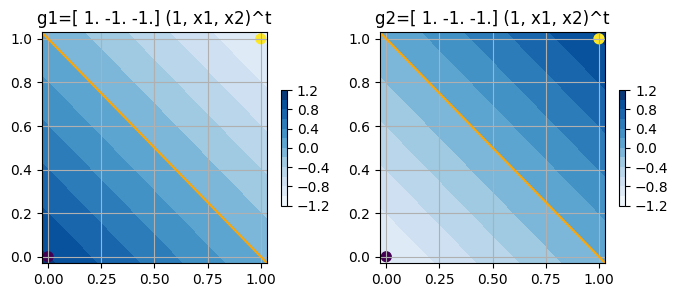

In [3]:
import numpy as np; import matplotlib.pyplot as plt
X = np.array([[0, 0], [1, 1]]).astype(float); y = np.array([1, 2]).astype(int)
x1, x2 = np.meshgrid(np.linspace(-.03, 1.03, 50), np.linspace(-.03, 1.03, 50))
XX = np.c_[np.ravel(x1), np.ravel(x2)]
W = np.array([[1, -1, -1], [-1, 1, 1]]).astype(float)
gg = lambda x: (W[0, 0] + W[0, 1:] @ x, W[1, 0] + W[1, 1:] @ x)
GG = np.apply_along_axis(gg, 1, XX)
_, axs = plt.subplots(1, 2, figsize=(8, 3))
for i, ax in enumerate(axs.flat):
    ax.grid(); ax.set_title(f'g{i+1}={W[0,:]} (1, x1, x2)^t')
    ax.contour(x1, x2, GG[:, i].reshape(x1.shape), 1, colors='orange', linestyles='solid')
    cp = ax.contourf(x1, x2, GG[:, i].reshape(x1.shape), 10, cmap='Blues')
    plt.colorbar(cp, ax=ax, shrink=0.5); ax.scatter(*X.T, c=y, s=50);

# 3 Convergència i qualitat de la solució

**Convergència:** $\;$ Perceptró convergeix si les dades són **linealment separables**

**Efecte del factor d'aprenentatge $\alpha>0$:** $\;$ convergeix amb independència del valor triat, encara que lentament si $\alpha$ és molt menut

**Efecte del marge $b\geq 0$:** $\;$ convergeix amb fronteres centrades si triem un valor pròxim al màxim marge que permet discriminar linealment les mostres amb marge; si ens passem, Perceptró no convergeix
* Cal fer experiments amb diferents valors del marge per tal de trobar un valor que generalitze òptimament